<a href="https://colab.research.google.com/github/PaulToronto/University-of-Colorado-Boulder---Essential-Math-Specialization/blob/main/1_Linear_Systems_and_Gaussian_Elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Linear Systems and Gaussian Elimination

## Imports

In [1]:
!pip install -q ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.0 MB/s eta 0:00:00


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## 2.1.1 Introduction

### 2.1.1.1 Linear System and Definition

- $a_i$ are constants
    - can be any number, real or complex, as long as they are not a function of a different variable
- $b$ is a constant
- $x_i$ are variables
    - must be linear variables

If you can write a sytem in the following way, then it is a **linear equation**, if you can't write a system in this way, then it is not a linear system.

$$
a_1x_1 + a_2x_2 + \cdots + a_nx_n = b
$$

#### Example of a Linear Equation

$$
2x_1 + \sqrt{3}x_2 = 4
$$

#### Examples of what is not Linear Equation

1. $x_1x_2 + 3x_3 = 5$
2. $4\sqrt{x_1} + x_2 = \sqrt{5}$


### 2.1.1.2 Three Solution Options and Coordinate System Visualization

A **linear system** is a set of linear equations.

$$
\begin{align}
2x_1 + x_2 &= 3 \\
-x_1 - x_2 &= -\sqrt{4}
\end{align}
$$

What $x_1$ and $x_2$ values make both equations true in 2-space?

1. Two lines intersect. There is one and only one solution.
2. Two lines are parallel. There are no solutions.
3. Two linear equations are the same line. There are infinite solutions.


## 2.1.2 Matrices and Gaussian Elimination

### 2.1.2.1 Linear System $\implies$ Matrix: (Coefficient and Augmented)

### A linear system can be expressed in matrix form

$$
\begin{align}
3x_1 + x_2 &= 2 \\
-x_1 &= -1 \\
-4x_1 + \sqrt{2}x_2 &= \sqrt{3}
\end{align}
$$

#### Coefficient Matrix

$$
\begin{bmatrix}
3 & 1 \\
-1 & 0 \\
-4 & \sqrt{2}
\end{bmatrix}
$$

#### Augmented Matrix

$$
\begin{bmatrix}
3 & 1 & \bigm| & 2 \\
-1 & 0 & \bigm| & -1 \\
-4 & \sqrt{2} & \bigm| & \sqrt{3}
\end{bmatrix}
$$

### 2.1.2.2 Rules of G.E. and Solving a Linear System

$$
\begin{align}
x_1 + x_2 - x_3 &= -1 \\
x_1 + x_2 + x_3 &= 1
\end{align}
\implies
\begin{bmatrix}
1 & 1 & -1 & \bigm| & -1 \\
1 & 1 & 1 & \bigm| & 1
\end{bmatrix}
$$



#### 3 Rules:

1. Interchange 2 rows
2. Multiply a row by a non-zero constant
3. Add a multiple of one row to another row

### 2.1.2.3 G.E. Intuition and Simple Example

In [4]:
M = sym.Matrix([[1, 1, -1, -1],
                [1, 1, 1, 1]])
M

Matrix([
[1, 1, -1, -1],
[1, 1,  1,  1]])

$R_1 \leftarrow -R_1$

In [5]:
M[0,:] = -M.row(0)
M

Matrix([
[-1, -1, 1, 1],
[ 1,  1, 1, 1]])

$R_1 \leftarrow R_1 + R_2$

In [6]:
M[0,:] = M.row(0) + M.row(1)
M

Matrix([
[0, 0, 2, 2],
[1, 1, 1, 1]])

$R_1 \leftarrow \frac{1}{2}R_1$

In [7]:
M[0,:] = sym.Rational(1,2) * M.row(0)
M

Matrix([
[0, 0, 1, 1],
[1, 1, 1, 1]])

It is now clear that $x_3 = 1$

### 2.1.2.4 G.E Example - Single Solution

$A$ is an augmented matrix that represents a linear system.

In [8]:
A = sym.Matrix([[1, -2, 1, 0],
                [0, 2, -8, 8],
                [5, 0, -5, 10]])
A

Matrix([
[1, -2,  1,  0],
[0,  2, -8,  8],
[5,  0, -5, 10]])

$R_3 \leftarrow R_3 - 5R_1$

In [9]:
A[2,:] = A.row(2) - 5 * A.row(0)
A

Matrix([
[1, -2,   1,  0],
[0,  2,  -8,  8],
[0, 10, -10, 10]])

$R_3 \leftarrow R_3 - 5R_2$

In [10]:
A[2,:] = A.row(2) - 5 * A.row(1)
A

Matrix([
[1, -2,  1,   0],
[0,  2, -8,   8],
[0,  0, 30, -30]])

$R_2 \leftarrow \frac{1}{2}R_2$
<br>
$R_3 \leftarrow \frac{1}{30}R_3$

In [11]:
A[1,:] = sym.Rational(1, 2) * A.row(1)
A[2,:] = sym.Rational(1, 30) * A.row(2)
A

Matrix([
[1, -2,  1,  0],
[0,  1, -4,  4],
[0,  0,  1, -1]])

$R_2 \leftarrow R_2 + 4R_3$

In [12]:
A[1,:] = A.row(1) + 4 * A.row(2)
A

Matrix([
[1, -2, 1,  0],
[0,  1, 0,  0],
[0,  0, 1, -1]])

$R_1 \leftarrow R_1 - R_3$

In [13]:
A[0,:] = A.row(0) - A.row(2)
A

Matrix([
[1, -2, 0,  1],
[0,  1, 0,  0],
[0,  0, 1, -1]])

$R_1 \leftarrow R_1 + 2R_2$

In [14]:
A[0,:] = A.row(0) + 2 * A.row(1)
A

Matrix([
[1, 0, 0,  1],
[0, 1, 0,  0],
[0, 0, 1, -1]])

$$
\begin{align}
x_1 &= 1 \\
x_2 &= 0 \\
x_3 &= -1
\end{align}
$$

In [15]:
# using sympy
A = sym.Matrix([[1, -2, 1, 0],
                [0, 2, -8, 8],
                [5, 0, -5, 10]])

A.rref(pivots=False)

Matrix([
[1, 0, 0,  1],
[0, 1, 0,  0],
[0, 0, 1, -1]])

## 2.1.3 Advanced G.E. with Examples

### 2.1.3.1 G.E. Example - Infinite Solutions

$$
\begin{align}
x_1 + x_2 - x_3 &= -1 \\
x_1 + x_2 + x_3 &= 1
\end{align}
$$

In [16]:
B = sym.Matrix([[1, 1, -1, -1],
                [1, 1, 1, 1]])
B

Matrix([
[1, 1, -1, -1],
[1, 1,  1,  1]])

In [17]:
B.rref(pivots=False)

Matrix([
[1, 1, 0, 0],
[0, 0, 1, 1]])

$$
\begin{align}
x_1 + x_2 &= 0 \\
x_3 &= 1
\end{align}
$$

Let $x_2 = t$

$$
\begin{align}
x_1 &= -t \\
x_2 &= t \\
x_3 &= 1 \\
\end{align}
$$

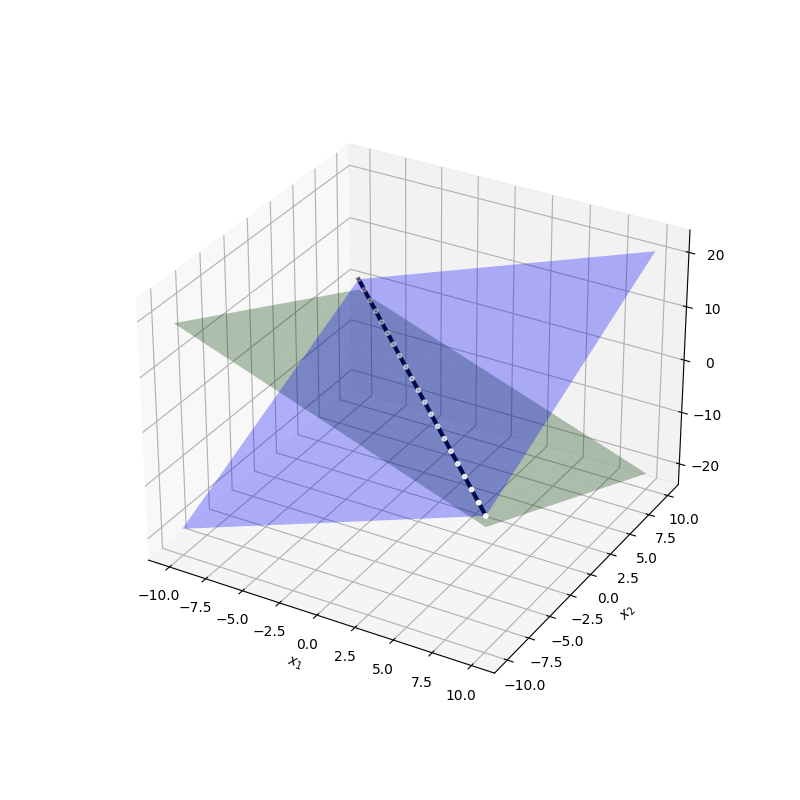

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)

X, Y = np.meshgrid(x, y)

# first plane
Z1 = X + Y + 1
ax.plot_surface(X, Y, Z1, alpha=0.3, color='blue')

# second plane
Z2 = -X - Y - 1
ax.plot_surface(X, Y, Z2, alpha=0.3, color='green')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# line of intersection
start = -10
end = 10
line = [[-t, t, 1] for t in [start, end]]
line = zip(line[0], line[1])
x1, x2, x3 = list(line)
ax.plot3D(x1, x2, x3, linewidth=3, c='black')

some_solutions = []
for t in np.linspace(start, end, 21):
    some_solutions.append(np.array([-t, t, 1]))
some_solutions = np.array(some_solutions)
ax.scatter(some_solutions[:,0], some_solutions[:,1], some_solutions[:,2], c='white', s=10)

plt.show()

### 2.3.1.2 G.E. Example - No Solutions

In [19]:
C = sym.Matrix([[2, -3, 2, 1],
                [0, 1, -4, 8],
                [4, -8, 12, 1]])
C

Matrix([
[2, -3,  2, 1],
[0,  1, -4, 8],
[4, -8, 12, 1]])

$R_3 \leftarrow R_3 - 2R_1$

In [20]:
C[2,:] = C.row(2) - 2 * C.row(0)
C

Matrix([
[2, -3,  2,  1],
[0,  1, -4,  8],
[0, -2,  8, -1]])

$R_3 \leftarrow R_3 + 2R_2$

In [21]:
C[2,:] = C.row(2) + 2 * C.row(1)
C

Matrix([
[2, -3,  2,  1],
[0,  1, -4,  8],
[0,  0,  0, 15]])

This system has **no solutions**.

In [22]:
C = sym.Matrix([[2, -3, 2, 1],
                [0, 1, -4, 8],
                [4, -8, 12, 1]])

C.rref(pivots=False)

Matrix([
[1, 0, -5, 0],
[0, 1, -4, 0],
[0, 0,  0, 1]])

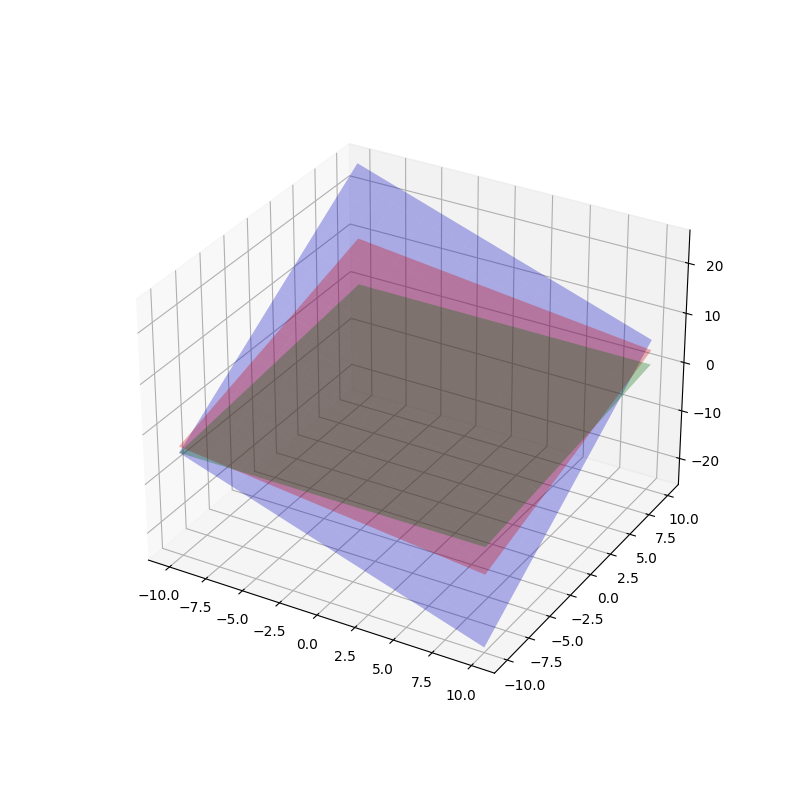

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)

X, Y = np.meshgrid(x, y)

# first plane
Z1 = -X + (3/2) * Y + 1/2
ax.plot_surface(X, Y, Z1, alpha=0.3, color='blue')

# second plane
Z2 = (1/4) * Y - 2
ax.plot_surface(X, Y, Z2, alpha=0.3, color='green')

# third plane
Z3 = (-1/3) * X + (2/3) * Y + (1/12)
ax.plot_surface(X, Y, Z3, alpha=0.3, color='red')

plt.show()

I think that each pair of planes intersect with each other, but it is not a single line of intersection. I think there are 3 lines of intersection.

### 2.1.3.3 G.E. Advanced Example

In [24]:
D = sym.Matrix([[1, 2, 3, 24],
                [2, -1, 1, 3],
                [3, 4, -5, -6]])
D

Matrix([
[1,  2,  3, 24],
[2, -1,  1,  3],
[3,  4, -5, -6]])

$R_2 \leftarrow R_2 - 2R_1$
<br>
$R_3 \leftarrow R_3 - 3R_1$

In [25]:
D[1,:] = D.row(1) - 2 * D.row(0)
D[2,:] = D.row(2) - 3 * D.row(0)
D

Matrix([
[1,  2,   3,  24],
[0, -5,  -5, -45],
[0, -2, -14, -78]])

$R_2 \leftarrow -\frac{1}{5}R_2$
<br>
$R_3 \leftarrow -\frac{1}{2}R_3$

In [26]:
D[1,:] = -sym.Rational(1, 5) * D.row(1)
D[2,:] = -sym.Rational(1, 2) * D.row(2)
D

Matrix([
[1, 2, 3, 24],
[0, 1, 1,  9],
[0, 1, 7, 39]])

$R_3 \leftarrow R_3 - R_2$

In [27]:
D[2,:] = D.row(2) - D.row(1)
D

Matrix([
[1, 2, 3, 24],
[0, 1, 1,  9],
[0, 0, 6, 30]])

$R_3 \leftarrow \frac{1}{6}R_3$

In [28]:
D[2,:] = sym.Rational(1, 6) * D.row(2)
D

Matrix([
[1, 2, 3, 24],
[0, 1, 1,  9],
[0, 0, 1,  5]])

$R_2 \leftarrow R_2 - R_3$
<br>
$R_1 \leftarrow R_1 - 3R_3$

In [29]:
D[1,:] = D.row(1) - D.row(2)
D[0,:] = D.row(0) - 3 * D.row(2)
D

Matrix([
[1, 2, 0, 9],
[0, 1, 0, 4],
[0, 0, 1, 5]])

$R_1 \leftarrow R_1 - 2R_2$

In [30]:
D[0,:] = D.row(0) - 2 * D.row(1)
D

Matrix([
[1, 0, 0, 1],
[0, 1, 0, 4],
[0, 0, 1, 5]])

$$
\begin{align}
x_1 &= 1 \\
x_2 &= 4 \\
x_3 &= 5
\end{align}
$$

In [31]:
# using sympy
D = sym.Matrix([[1, 2, 3, 24],
                [2, -1, 1, 3],
                [3, 4, -5, -6]])

D.rref(pivots=False)

Matrix([
[1, 0, 0, 1],
[0, 1, 0, 4],
[0, 0, 1, 5]])

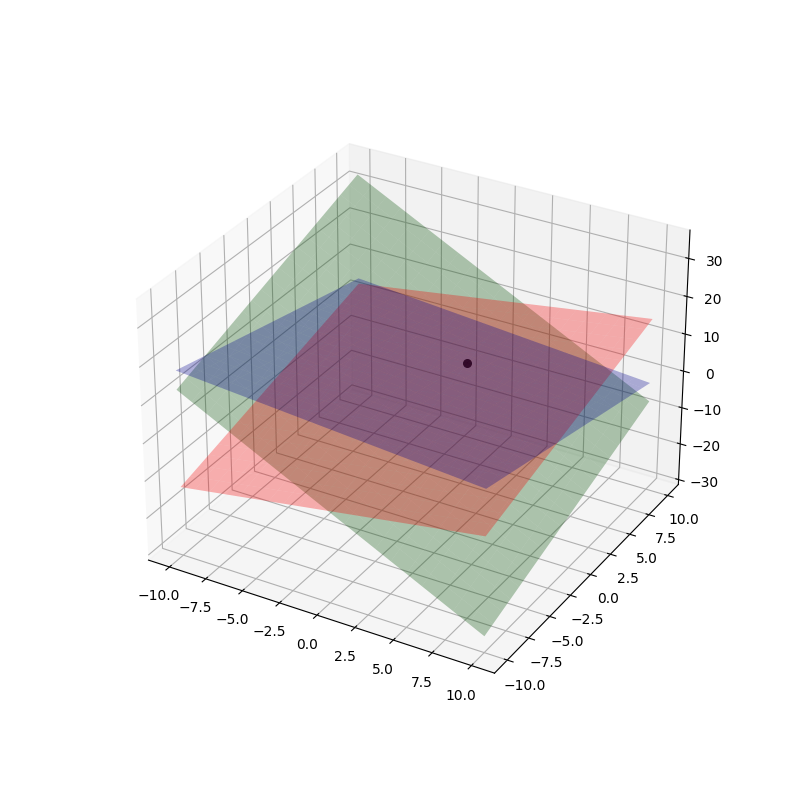

In [32]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)

X, Y = np.meshgrid(x, y)

# first plane
Z1 = (-1/3) * X - (2/3) * Y + 8
ax.plot_surface(X, Y, Z1, alpha=0.3, color='blue')

# second plane
Z2 =  -2 * X + Y + 3
ax.plot_surface(X, Y, Z2, alpha=0.3, color='green')

# third plane
Z3 = (3/5) * X + (4/5) * Y + (6/5)
ax.plot_surface(X, Y, Z3, alpha=0.3, color='red')

# point of intersection
ax.scatter(1, 4, 5, c='black', s=30)

plt.show()